# Proyek Analisis Data: Bike Sharing

Developed for © Dicoding Academy Projects

By Muhammad Ridlo

## Background

Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, hingga pengembalian
telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan mengembalikan
kembali di lokasi lain. Saat ini, terdapat sekitar lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari
lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena perannya yang penting dalam masalah lalu lintas,
lingkungan, dan kesehatan.

Selain aplikasi sistem berbagi sepeda yang menarik di dunia nyata, karakteristik data yang dihasilkan oleh
sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi
perjalanan, posisi keberangkatan, dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi
jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Oleh karena itu, diharapkan sebagian besar
peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.

## Dataset Information

Proses penyewaan sepeda bersama sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi `weather` cuaca, `precipitation` curah hujan, `day of week`, hari dalam seminggu, `season` musim, `hour of the day` jam, dll. dapat memengaruhi perilaku penyewaan.

**Files**

* `hour.csv` : bike sharing counts aggregated on hourly basis `(records 17379 hours)`
* `day.csv`  : bike sharing counts aggregated on daily basis `(records 731 days)`

## Dataset Characteristics

Kedua dataset `hour.csv` dan `day.csv` memiliki kolom yang sama kecuali `hr` yang tidak tersedia di `day.csv`

- `instant`    : record index
- `dteday`     : date
- `season`     : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr`         : year (0: 2011, 1:2012)
- `mnth`       : month ( 1 to 12)
- `hr`         : hour (0 to 23)
- `holiday`    : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday`    : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp`       : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`      : Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`        : Normalized humidity. The values are divided to 100 (max)
- `windspeed`  : Normalized wind speed. The values are divided to 67 (max)
- `casual`     : count of casual users
- `registered` : count of registered users
- `cnt`        : count of total rental bikes including both casual and registered


# Menentukan Pertanyaan Bisnis

**Pertanyaan Deskriptif dan Perilaku Pengguna**
- Bagaimana proporsi antara pengguna casual dan registered? Siapa yang lebih banyak menyewa sepeda secara keseluruhan?
`Goals`: Distribusi Pengguna
- Pada jam berapa puncak tertinggi dan terendah penyewaan sepeda terjadi?
`Goals`: Perilaku Harian Pengguna
- Bagaimana performa penyewaan sepeda pada tahun 2011 dan 2012?
`Goals`: Tren Pertumbuhan

**Pertanyaan Berbasis Waktu dan Musim**
- Musim manakah yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?
`Goals`: Korelasi Musim dengan Penyewaan

**Pertanyaan Berbasis Faktor Cuaca dan Lingkungan**
- Manakah kombinasi faktor cuaca yang menghasilkan jumlah sewa tertinggi dan terendah?
`Goals`: Korelasi Cuaca dengan Penyewaan

# Import Packages/Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('library berhasil diimport')

library berhasil diimport


# Data Wrangling

## Gathering Data

In [2]:
# load dataset bike_hour
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat `17 kolom` pada dataset `hour`

In [3]:
# load dataset day
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat `16 kolom` pada dataset `day`

## Assessing Data

### Assessing `hour_df`

In [4]:
# cek tipe data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Total Data : `17.379 entries`
- Missing value : `0`

**Temuan**
- Tipe data salah pada kolom `dteday` harusnya date bukan object

In [5]:
# cek duplicate hour_df
duplicated = hour_df.duplicated().sum()

print('Jumlah Data Duplicate: ', duplicated)

Jumlah Data Duplicate:  0


**Insight**
- Tidak ditemukan adanya data yang duplicate

In [6]:
#cek inaccurate hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Tidak ditemukan anomali pada dataset `hour_df`

### Assessing `day_df`

In [7]:
# cek tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Total Data : `731 entries`
- Missing value : `0`

**Temuan**
- Tipe data salah pada kolom `dteday` harusnya date bukan object

In [8]:
# cek duplicate day_df
duplicated = day_df.duplicated().sum()
print('Jumlah Data Duplicate: ', duplicated)

Jumlah Data Duplicate:  0


**Insight**

- Tidak ditemukannya data duplicate

In [9]:
# cek inaccurate day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- Tidak ditemukan anomali pada dataset `day_df`

### Kesimpulan Sementara
- Ditemukan dua kesalahan tipe data pada dua dataset di kolom `dteday` harusnya memiliki tipe data `datetime`

## Cleaning Data

- Di tahapan assessing ditemukan ketidaksesuaian tipe data pada kolom `dteday`, maka dari itu kita akan ubah dari `object` menjadi `datetime`
- Terlihat beberapa values pada kolom `season`, `month`, `weekday`, dan `weathersit` dapat diubah menjadi bentuk kategorikal yang lebih memudahkan kita dalam membaca, tapi sebelumnya kita harus mengubah tipe datanya dari `int` menjadi `category`
- Setelah itu mengubah isi valuesnya sesuai dengan karakteristik dataset yang sudah diberikan sebelumnya

### Ubah tipe data dteday

In [10]:
# mengubah tipe data dteday pada dataset hour_df
datetime_columns = ['dteday']

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

print("Tipe data berhasil diubah")

# cek ulang untuk dataset hour_df
hour_df.info()

Tipe data berhasil diubah
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 

Terlihat tipe data pada kolom `dteday` sudah menjadi `datetime64`

In [11]:
# mengubah tipe data dteday pada dataset bike_day
datetime_columns = ['dteday']

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

print("Tipe Data Berhasil Diubah")

# cek ulang untuk dataset bike_day
day_df.info()

Tipe Data Berhasil Diubah
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtype

Terlihat tipe data pada kolom `dteday` sudah menjadi `datetime64`

### Ganti Tipe Data Int ke Kategorikal

In [12]:
# mengubah tipe data season, month, weekday dan weathersit untuk dataset hour_df
columns = ['season', 'yr', 'mnth', 'weekday', 'weathersit']

for column in columns:
    hour_df[column] = hour_df[column].astype('category')

print("Tipe Data Berhasil Diubah")

# cek info tipe data
hour_df.info()


Tipe Data Berhasil Diubah
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 

Terlihat pada dataset `hour_df` untuk kolom `season`, `month`, `weekday`, dan `weathersit` tipe datanya sudah berganti menjadi category

In [13]:
# mengubah tipe data season, month, weathersit untuk dataset day_df

column = ['season', 'yr', 'mnth', 'weekday', 'weathersit']

for column in columns:
    day_df[column] = day_df[column].astype('category')

print ('Tipe data berhasil diubah')

# cek info tipe data
day_df.info()

Tipe data berhasil diubah
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtype

Terlihat pada dataset `hour_df` untuk kolom `season`, `month`, `weekday`, dan `weathersit` tipe datanya sudah berganti menjadi category

### Ubah Values dari Int ke Kategorikal

In [14]:
# mengubah values untuk kolom season
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}

hour_df['season'] = hour_df['season'].map(season_map)
day_df['season'] = day_df['season'].map(season_map)

print('Values sudah berhasil diganti')


Values sudah berhasil diganti


In [15]:
# mengubah values untuk kolom month
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mei', 6:'Jun', 7:'Jul', 8:'Agu', 9:'Sep', 10:'Okt', 11:'Nov', 12:'Des'}

hour_df['mnth'] = hour_df['mnth'].map(month_map)
day_df['mnth'] = day_df['mnth'].map(month_map)

print('Values sudah berhasil diganti')

Values sudah berhasil diganti


In [16]:
# mengubah values untuk kolom year
year_map = {0:'2011', 1:'2012'}

hour_df['yr'] = hour_df['yr'].map(year_map)
day_df['yr'] = day_df['yr'].map(year_map)

print('Values sudah berhasil diganti')

Values sudah berhasil diganti


In [17]:
# mengubah values untuk kolom weekday
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)

print('Values sudah berhasil diganti')

Values sudah berhasil diganti


In [18]:
# mengubah values untuk weathersit
weathersit_map = {1:'Clear', 2:'Misty', 3:'Light Rain', 4:'Heavy Rain'}

hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_map)
day_df['weathersit'] = day_df['weathersit'].map(weathersit_map)

print('Values sudah berhasil diganti')

Values sudah berhasil diganti


# Exploratory Data Analysis (EDA)

## Explore hour_df

In [19]:
# melihat rangkuman parameter
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman parameter tersebut, didapatkan sebuah insight bahwa pelanggan terbanyak ada di `fall season`, bulan `Juli`, hari `Sabtu`, dan kondisi cuaca "clear"

In [20]:
# melihat jumlah pengguna berdasarkan jam
hour_df.groupby(by = 'hr')[['casual', 'registered', 'cnt']].sum().sort_values(by = 'cnt', ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Berdasarkan data tersebut didapatkan sebuah informasi bahwa, pengguna paling banyak menyewa sepeda pada jam 17-18 (sore) dan jam 8 (pagi). Serta jika dibandingkan pengguna registered lebih banyak daripada pengguna casual

## Explore day_df

In [21]:
# melihat rangkuman parameter
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,NaN,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Sama seperti dataset hour_df, rangkuman parameter day_df memiliki insight bahwa pelanggan terbanyak ada di `fall season`, bulan `Januari`, hari `Minggu`, dan kondisi cuaca "clear". Kemudian dataset ini juga memiliki rentang waktu dari tahun 2011 sampai 2012

In [22]:
# melihat total pengguna berdasarkan tipe
day_df[['casual', 'registered', 'cnt']].sum()

casual         620017
registered    2672662
cnt           3292679
dtype: int64

Berdasarkan informasi tersebutm dapat diketahui bahwa 
- Jumlah total penyewa sepeda keseluruhan adalah `3.292.679`
- Jumlah penyewa casual `620.017`
- Jumlah penyewa registered `2.672.662`

In [23]:
# melihat total pengguna berdasarkan musim
day_df.groupby(by = 'season').agg({
    'cnt':['sum']
})

C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\3014560086.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'season').agg({


,cnt
,sum
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


Berdasarkan informasi tersebut, dapat diketahui sebuah insight bahwa `fall season` merupakan musim dengan paling banyak peminjam dan `spring season` merupakan musim dengan paling sedikit peminjam

In [24]:
# melihat total pengguna pada tahun 2011 dan 2012 berdasarkan tipe
day_df.groupby(by = 'yr').agg({
    'casual':['sum'],
    'registered':['sum']
})

C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\1403729881.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'yr').agg({


,casual,registered
,sum,sum
yr,,
2011,247252,995851
2012,372765,1676811


Berdasarkan informasi tersebut, dapat diketahui sebuah insight yaitu pada tahun 2012 mengalami kenaikan daripada tahun 2011

In [25]:
# melihat jumlah pengguna berdasarkan cuaca
day_df.groupby(by = 'weathersit').agg({
    'cnt':['sum']
})

C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\4014538872.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'weathersit').agg({


,cnt
,sum
weathersit,
Clear,2257952
Misty,996858
Light Rain,37869


Berdasarkan informasi tersebut, didapat sebuah insight bahwa pengguna terbanyak meminjam sepeda saat cuaca `clear` dan sedikit pengguna yang meminjam pada cuaca `heavy_rainsow`

# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana proporsi antara pengguna casual dan registered? Siapa yang lebih banyak menyewa sepeda secara keseluruhan?

In [26]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

print(total_casual)
print(total_registered)

print(total_casual+total_registered)

620017
2672662
3292679


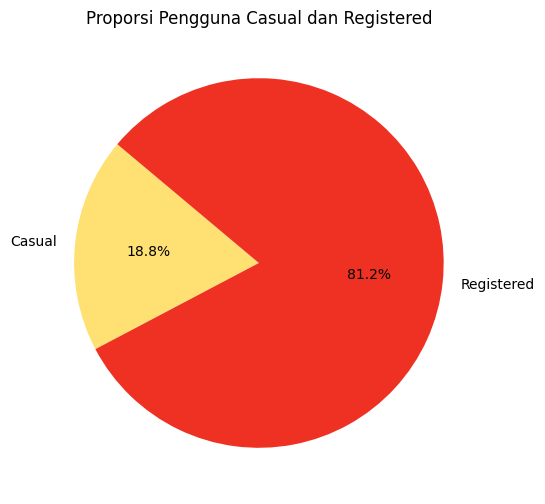

In [27]:
# menghitung total pengguna 
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# membuat visualisasi
labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=['#FFE072','#ee3123'], autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Pengguna Casual dan Registered')
plt.show()


**Insight:**

Dari visualisasi yang disajikan, terlihat bahwa pengguna registered memiliki proporsi lebih banyak daripada pengguna casual yang menyewa sepeda dengan perbandingan data `81,2%` untuk pengguna registered dan `18,8%` untuk pengguna casual

## Pertanyaan 2: Pada jam berapa puncak tertinggi dan terendah penyewaan sepeda terjadi?

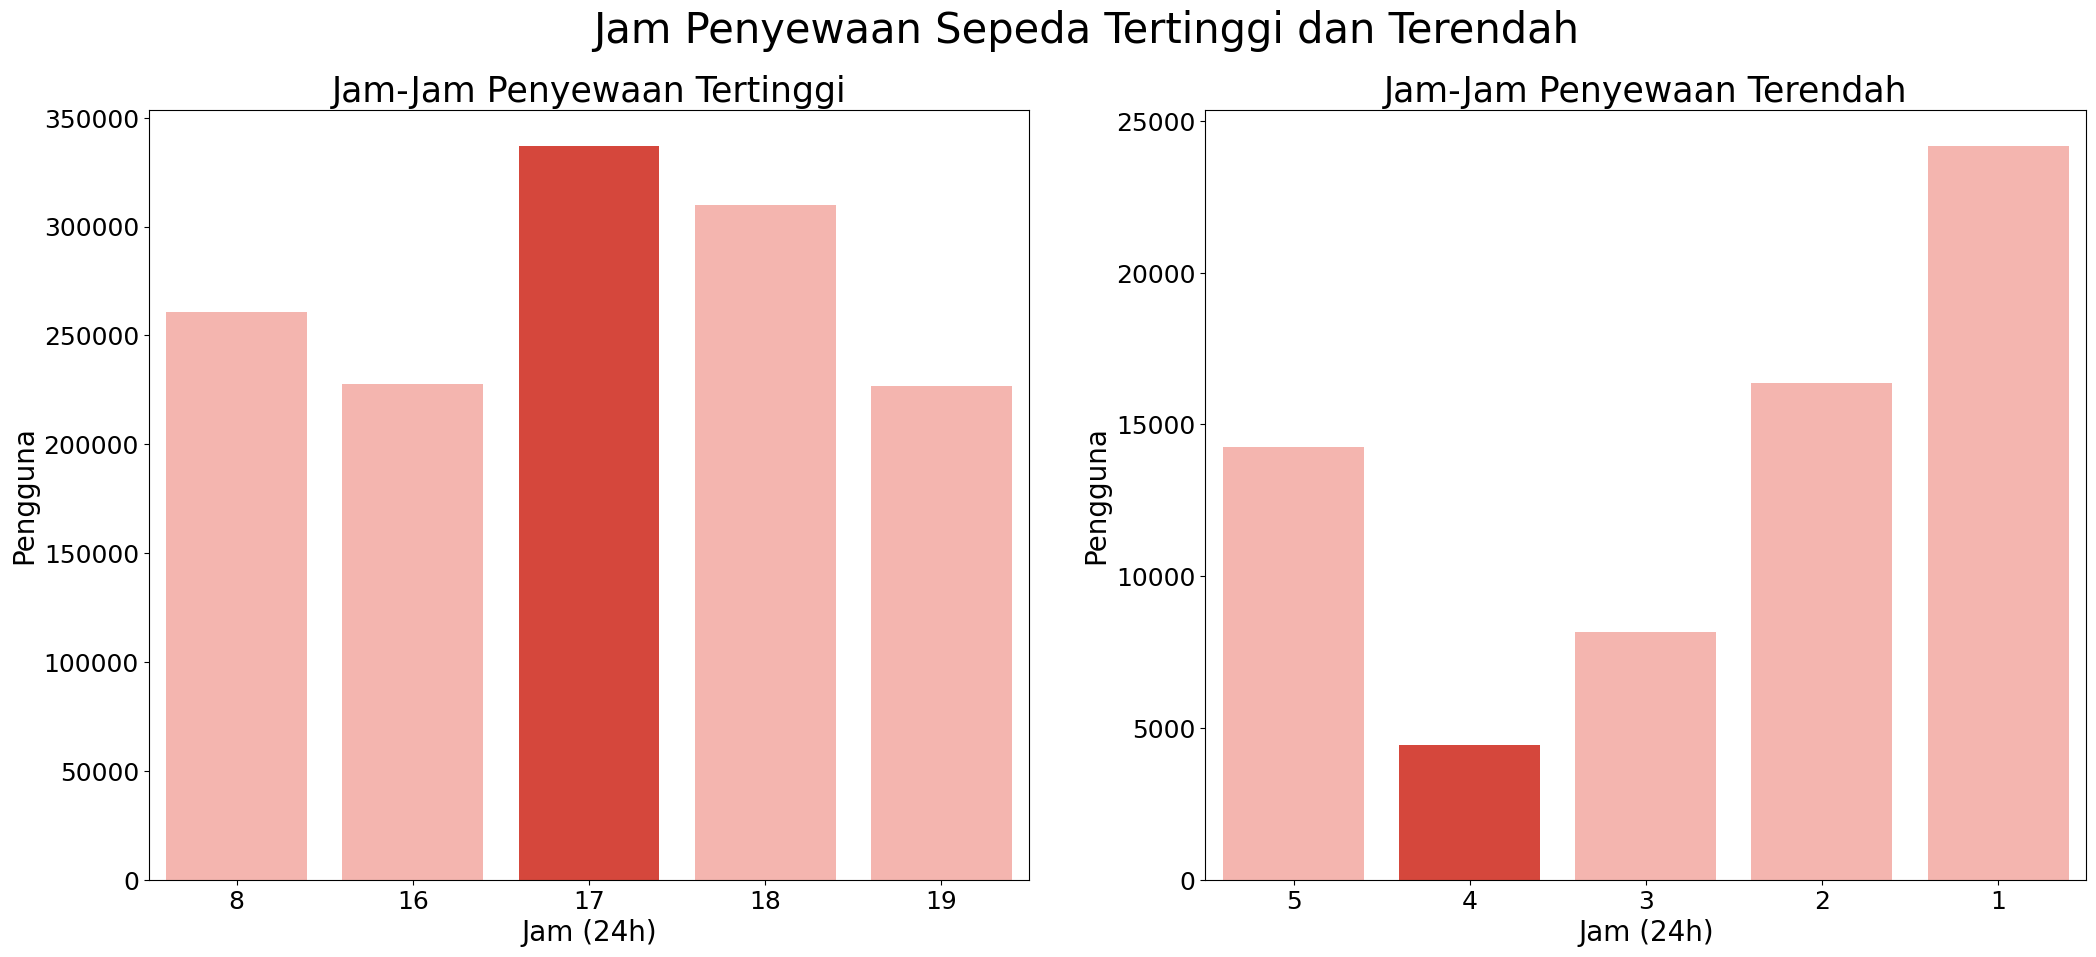

In [28]:
# menghitung pengguna berdasarkan jam
sum_hour = hour_df.groupby(by = 'hr').cnt.sum().sort_values(ascending=False).reset_index()

# membuat visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
colors0 = ["#ffaba4ff","#ffaba4ff", '#ee3123',"#ffaba4ff","#ffaba4ff",]
colors1 = ["#ffaba4ff","#ffaba4ff","#ffaba4ff",'#ee3123', "#ffaba4ff",]

# membuat visualisasi jam penyewaan tertinggi
sns.barplot(x='hr', y='cnt', data=sum_hour.sort_values(by='cnt', ascending=False).head(5), palette=colors0, hue='hr', legend=False, ax=ax[0])
ax[0].set_ylabel('Pengguna', fontsize=20)
ax[0].set_xlabel('Jam (24h)', fontsize=20)
ax[0].set_title('Jam-Jam Penyewaan Tertinggi', fontsize=25)
ax[0].tick_params(axis='y', labelsize=18)
ax[0].tick_params(axis='x', labelsize=18)

# membuat visualisasi jam penyewaan terendah
sns.barplot(x='hr', y='cnt', data=sum_hour.sort_values(by='cnt', ascending=True).head(5), palette=colors1, hue='hr', legend=False, ax=ax[1])
ax[1].set_ylabel('Pengguna', fontsize=20)
ax[1].set_xlabel('Jam (24h)', fontsize=20)
ax[1].invert_xaxis()
ax[1].set_title('Jam-Jam Penyewaan Terendah', fontsize=25)
ax[1].tick_params(axis='y', labelsize=18)
ax[1].tick_params(axis='x', labelsize=18)

plt.suptitle('Jam Penyewaan Sepeda Tertinggi dan Terendah', fontsize=30)
plt.show()

**Insight:**

Dari visualisasi yang disajikan, terlihat bahwa penyewaan sepeda tertinggi ada di jam 17.00 (sore) dan penyewaan sepeda terendah ada di jam 04.00 (pagi)

## Pertanyaan 3: Bagaimana performa penyewaan sepeda pada tahun 2011 dan 2012?

In [29]:
# menghitung performa penyewaan sepeda tahun 2011
data_2011 = day_df[day_df['dteday'].dt.year == 2011] # memfilter data dari tahun 2011 saja
data_2011.set_index('dteday', inplace=True) # mengubah kolom dteday menjadi index waktu
monthly_2011 = data_2011['cnt'].resample('M').sum().reset_index()

monthly_2011.head(12)

C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\1903355232.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_2011 = data_2011['cnt'].resample('M').sum().reset_index()


,dteday,cnt
0,2011-01-31,38189
1,2011-02-28,48215
2,2011-03-31,64045
3,2011-04-30,94870
4,2011-05-31,135821
5,2011-06-30,143512
6,2011-07-31,141341
7,2011-08-31,136691
8,2011-09-30,127418
9,2011-10-31,123511


In [30]:
# menghitung performa penyewaan tahun 2012
data_2012 = day_df[day_df['dteday'].dt.year == 2012] # memfilter data dari tahun 2012 saja
data_2012.set_index('dteday', inplace = True) # mengubah kolom dteday menjadi index waktu
monthly_2012 = data_2012['cnt'].resample('M').sum().reset_index() # mengelompokkan data berdasarkan bulan dan menjumlahkan
monthly_2012.head(12)

C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\3398568825.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_2012 = data_2012['cnt'].resample('M').sum().reset_index() # mengelompokkan data berdasarkan bulan dan menjumlahkan


,dteday,cnt
0,2012-01-31,96744
1,2012-02-29,103137
2,2012-03-31,164875
3,2012-04-30,174224
4,2012-05-31,195865
5,2012-06-30,202830
6,2012-07-31,203607
7,2012-08-31,214503
8,2012-09-30,218573
9,2012-10-31,198841


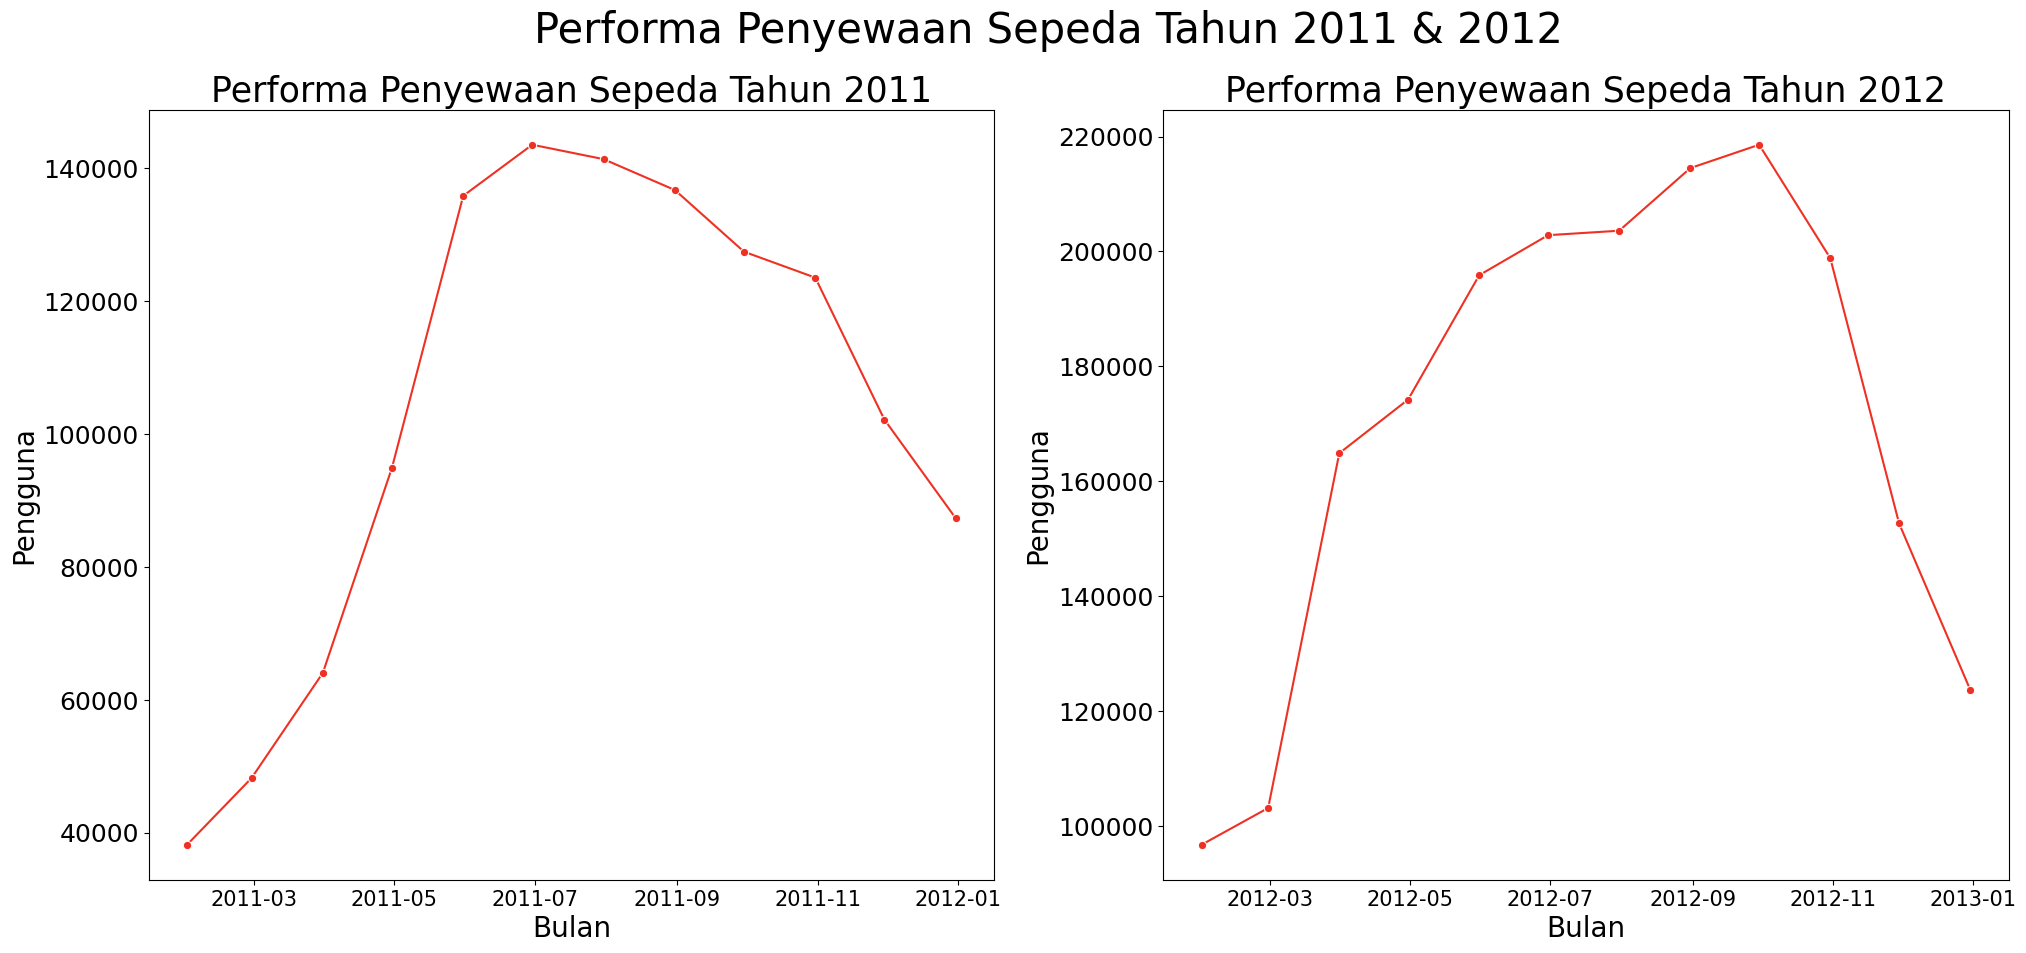

In [31]:
# membuat visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,10))

# membuat visualisasi tahun 2011
sns.lineplot(x='dteday', y='cnt', data=monthly_2011, marker='o', color='#ee3123', ax=ax[0])
ax[0].set_ylabel('Pengguna', fontsize=20)
ax[0].set_xlabel('Bulan', fontsize=20)
ax[0].set_title('Performa Penyewaan Sepeda Tahun 2011', fontsize=25)
ax[0].tick_params(axis = 'y', labelsize=18)
ax[0].tick_params(axis = 'x', labelsize=15)

# membuat visualisasi tahun 2012
sns.lineplot(x='dteday', y='cnt', data=monthly_2012, marker='o', color='#ee3123', ax=ax[1])
ax[1].set_ylabel('Pengguna', fontsize=20)
ax[1].set_xlabel('Bulan', fontsize=20)
ax[1].set_title('Performa Penyewaan Sepeda Tahun 2012', fontsize=25)
ax[1].tick_params(axis = 'y', labelsize=18)
ax[1].tick_params(axis = 'x', labelsize=15)

plt.suptitle('Performa Penyewaan Sepeda Tahun 2011 & 2012', fontsize=30)
plt.show()

**Insight:**

Dari visualisasi yang disajikan, terlihat sebuah pola sebagai berikut
- Pada tahun 2011, bulan `Januari` hingga `Maret` merupakan bulan dengan performa penyewaan terendah yang di mana terlihat dalam grafik berada di range 35.000-65.000an. Sedangkan pada bulan `Juni` merupakan bulan dengan performa penyewaan tertinggi yang di mana berada di range 140.000an
- Pada tahun 2012, bulan `Januari` hingga `Maret` merupakan bulan dengan performa penyewaan terendah pada tahun tersebut dengan range 100.000an, walaupun angka ini meningkat dari tahun sebelumnya. Sedangkan pada bulan `September` merupakan bulan dengan performa penyewaan tertinggi yang di mana berada di range 210.000an

## Pertanyaan 4: Musim manakah yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?

In [32]:
# menghitung jumlah penyewaan berdasarkan musim
season = day_df.groupby(by = 'season').cnt.sum().reset_index()
season.head()

C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\250842603.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season = day_df.groupby(by = 'season').cnt.sum().reset_index()


,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\685752423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season, palette=colors, legend=False)
C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\685752423.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='season', y='cnt', data=season, palette=colors, legend=False)


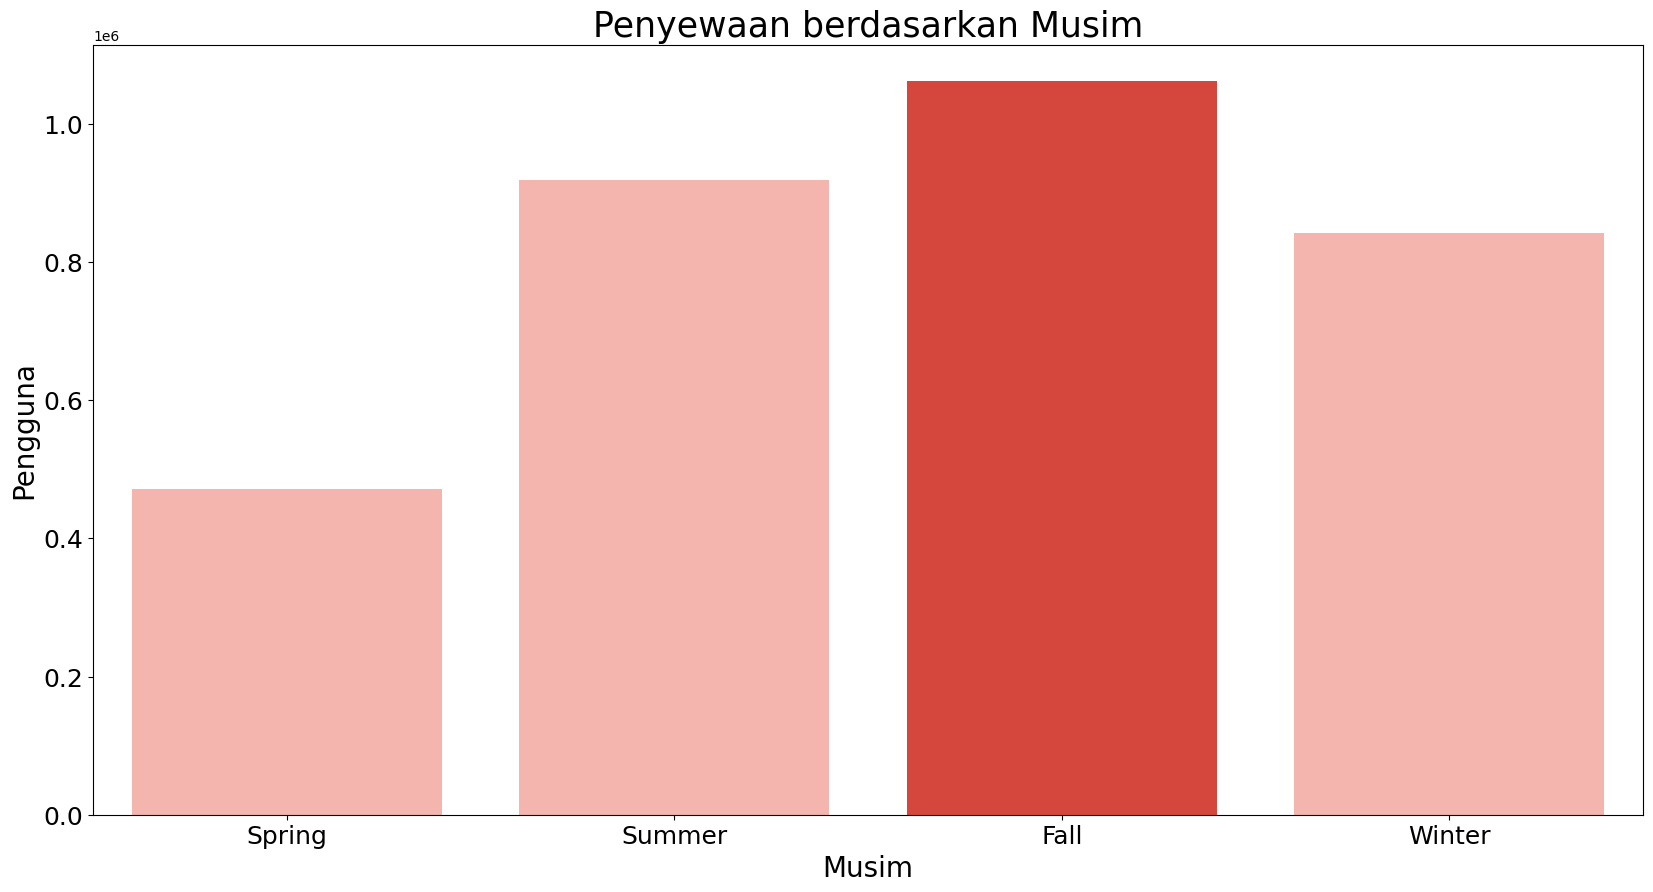

In [33]:
# membuat visualisasi
plt.figure(figsize=(20, 10))
colors = ["#ffaba4ff","#ffaba4ff",'#ee3123', "#ffaba4ff", "#ffaba4ff",]

sns.barplot(x='season', y='cnt', data=season, palette=colors, legend=False)
plt.ylabel('Pengguna', fontsize=20)
plt.xlabel('Musim', fontsize=20)
plt.title('Penyewaan berdasarkan Musim', fontsize=25)
plt.tick_params(axis='y', labelsize=18)
plt.tick_params(axis='x', labelsize=18)

**Insight:**

Dari visualisasi yang disajikan, terlihat bahwa jumlah penyewaan sepeda tertinggi ada di musim `Fall Season` dengan jumlah 1.061.129 dan penyewaan sepeda terendah ada di musim `Spring Season` dengan jumlah 471.348

## Pertanyaan 5: Manakah kombinasi faktor cuaca yang menghasilkan jumlah sewa tertinggi dan terendah?

In [34]:
# menghitung jumlah penyewaan berdasarkan cuaca
weathersit = day_df.groupby(by = 'weathersit').cnt.sum().reset_index()
weathersit.head()

C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\1821839603.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weathersit = day_df.groupby(by = 'weathersit').cnt.sum().reset_index()


,weathersit,cnt
0,Clear,2257952
1,Misty,996858
2,Light Rain,37869


C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\1211409834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weathersit, palette=colors, legend=False)
C:\Users\Asrock\AppData\Local\Temp\ipykernel_18500\1211409834.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='weathersit', y='cnt', data=weathersit, palette=colors, legend=False)


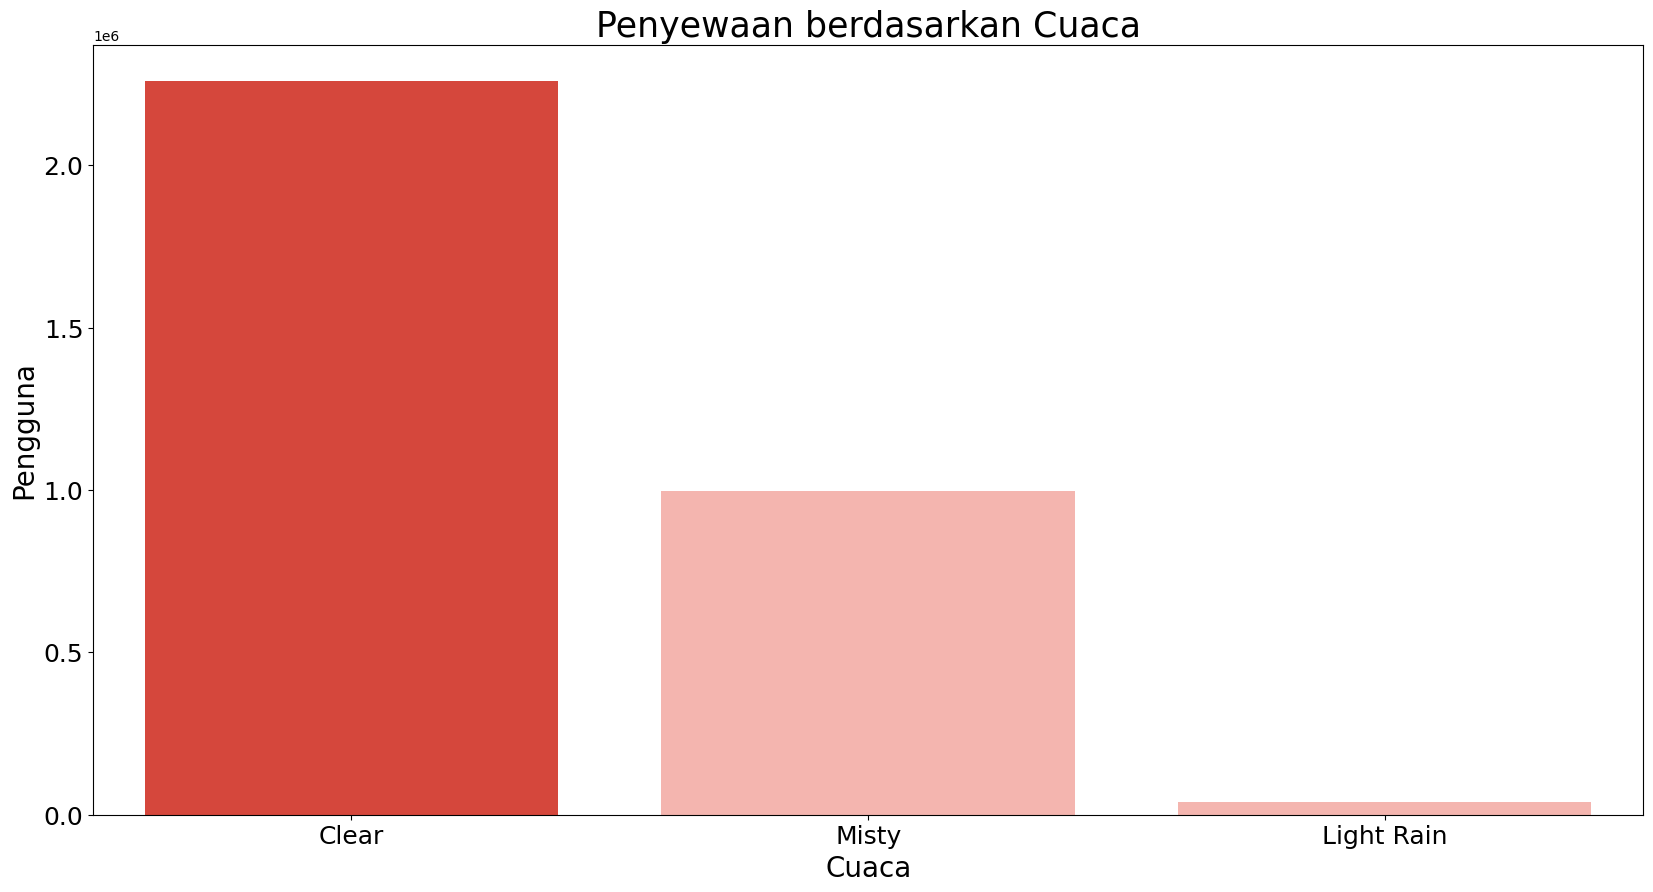

In [35]:
# membuat visualisasi
plt.figure(figsize=(20, 10))
colors = ['#ee3123', "#ffaba4ff","#ffaba4ff", "#ffaba4ff", "#ffaba4ff",]

sns.barplot(x='weathersit', y='cnt', data=weathersit, palette=colors, legend=False)
plt.ylabel('Pengguna', fontsize=20)
plt.xlabel('Cuaca', fontsize=20)
plt.title('Penyewaan berdasarkan Cuaca', fontsize=25)
plt.tick_params(axis='y', labelsize=18)
plt.tick_params(axis='x', labelsize=18)

**Insight:**

Dari visualisasi yang disajikan, terlihat bahwa jumlah penyewaan sepeda paling banyak ketika cuaca `Clear` dan paling sedikit ketika cuaca `Heavy Rain`

# Conclusion

**Pertanyaan 1**

**Bagaimana proporsi antara pengguna casual dan registered? Siapa yang lebih banyak menyewa sepeda secara keseluruhan?**

Conclusion:

Pengguna casual dan registered memiliki `proporsi 81.2% untuk pengguna Registered` dan `18.8% untuk pengguna Casual` yang di mana ini dapat diartikan bahwa secara garis besar lebih banyak penyewa sepeda yang terdaftar secara keseluruhan. Jika dilihat secara data, jumlah pengguna `casual sebanyak 620.017 pengguna` dan pengguna `registered sebanyak 2.672.662`. Dengan `total keseluruhan penyewa sepeda sebanyak 3.292.679`.


**Pertanyaan 2**

**Pada jam berapa puncak tertinggi dan terendah penyewaan sepeda terjadi?**

Conclusion:

Pengguna yang menyewa sepeda lebih sering menyewa di `sore hari antara pukul 16:00 - 19:00` dan puncak tertingginya di `pukul 17:00` dengan `jumlah pengguna sebanyak 336.860`. Sedangkan untuk jam pengguna paling sedikit/terendah menyewa sepeda pada `pagi hari di pukul 4:00` dengan `jumlah pengguna sebanyak 4.428` dalam rentang waktu tahun 2011-2012.

**Pertanyaan 3**

**Bagaimana performa penyewaan sepeda pada tahun 2011 hingga tahun 2012?**

Conclusion:

- Pada tahun 2011, bulan `Januari sampai Maret` merupakan bulan dengan performa `penyewaan terendah` dengan range penyewaan antara `35.000 - 65.000 pengguna`. Kemudian di bulan selanjutnya angka pengguna yang meminjam sepeda perlahan naik hingga berada di titik penyewaan tertinggi pada bulan `Juni` dengan jumlah penyewaan sebanyak `143.512 pengguna`.
- Pada tahun 2012, masih sama dengan tahun sebelumnya, bulan `Januari sampai Maret` merupakan bulan dengan performa `penyewaan terendah` dengan range penyewaan antara `95.000 - 165.000` pengguna. Kemudian di bulan selanjutnya angka pengguna yang meminjam sepeda meningkat secara tajam hingga berada di titik penyewaan tertinggi pada bulan `September` dengan jumlah penyewaan sebanyak `218.573 pengguna`.

**Pertanyaan 4**

**Musim manakah yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?**

Conclusion:

Musim gugur atau `Fall Season` merupakan musim di mana pengguna paling tinggi menyewa sepeda dengan jumlah sebnyak `1.061.129`. Sedangkan untuk musim dengan penyewaan sepeda paling rendah yaitu pada musim semi `Spring Season` dengan jumlah sebanyak `471.348`

**Pertanyaan 5**

**Manakah kombinasi faktor cuaca yang menghasilkan jumlah penyewaan tertinggi dan terendah?**

Conclusion:
Faktor cuaca `clear` menghasilkan jumlah penyewa sepeda tertinggi diantara empat musim lainnya, yaitu sebanyak `2.338.173 pengguna` pada periode tahun 2011-2012. Sedangkan untuk faktor cuaca `heavy rain` menghasilkan jumlah penyewa sepeda terendah, yaitu sebanyak `223 pengguna`

In [36]:
pip freeze requirements.txt

altair==5.5.0
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1733250440834/work
attrs==25.3.0
babel==2.17.0
blinker==1.9.0
Bottleneck @ file:///C:/b/abs_816hr2khp1/croot/bottleneck_1731058648110/work
cachetools==6.1.0
certifi==2025.6.15
charset-normalizer==3.4.2
click==8.1.8
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1733218098505/work
comm @ file:///home/conda/feedstock_root/build_artifacts/comm_1733502965406/work
contourpy==1.3.0
cycler==0.12.1
debugpy @ file:///D:/bld/debugpy_1680755658559/work
decorator @ file:///home/conda/feedstock_root/build_artifacts/decorator_1740384970518/work
exceptiongroup @ file:///home/conda/feedstock_root/build_artifacts/exceptiongroup_1746947292760/work
executing @ file:///home/conda/feedstock_root/build_artifacts/executing_1745502089858/work
fonttools==4.58.5
gitdb==4.0.12
GitPython==3.1.44
idna==3.10
importlib_metadata @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_importlib-me